# Neural networks
Good article of the basics: https://victorzhou.com/blog/intro-to-neural-networks/   
Great video of the basics: https://www.youtube.com/watch?v=aircAruvnKk

### Introduction to Neural Networks.
"An artificial neural network (or neural network for short) is a predictive model motivated by the way the brain operates. Think of the brain as a collection of neurons wired together. Each neuron looks at the outputs of the other neurons that feed into it, does a calculation, and then either fires (if the calculation exceeds some threshhold) or doesn’t (if it doesn’t)."   

Pretty much the simplest neural network is the perceptron, which approximates a sin‐
gle neuron with n binary inputs. It computes a weighted sum of its inputs and “fires”
if that weighted sum is zero or greater    
(Source: Data Science From Scratch, Chapter 18)

![](http://www.saedsayad.com/images/Perceptron_bkp_1.png)



The code in the following is adapted from Chapter 18 "Neural Networks" in the Data Science from Scratch book. The code can be found at: https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/neural_networks.py


In [1]:
%reload_ext autoreload

In [2]:
import math

def sigmoid(t):
    """a step function made continous in order to use calculus (differential)"""
    return 1 / (1 + math.exp(-t)) # t=0 -> 1/2, t=100 -> ~ 1, t=-100 -> ~0

def neuron_output(weights, inputs):
    """reduces all values from input array and weights array to a value between 0 to 1"""
    return sigmoid(dot(weights, inputs)) 

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


![](images/sigmoid.png)

## A Trainings Dataset

We want to create a Multi-layer Perceptron, which can classifiy -or recognize- the digits from zero to nine for us. In `raw_digits` we create digits consisting out of 5x5 binary pixels. Consequently, each input in our trainings dataset is a binary vector of length 25.

Training data

In [3]:
raw_digits = [
        """@@@@@
           @...@
           @...@
           @...@
           @@@@@""",
        """..@..
           ..@..
           ..@..
           ..@..
           ..@..""",
        """@@@@@
           ....@
           @@@@@
           @....
           @@@@@""",
        """@@@@@
           ....@
           @@@@@
           ....@
           @@@@@""",
        """@...@
           @...@
           @@@@@
           ....@
           ....@""",
        """@@@@@
           @....
           @@@@@
           ....@
           @@@@@""",
        """@@@@@
           @....
           @@@@@
           @...@
           @@@@@""",
        """@@@@@
           ....@
           ....@
           ....@
           ....@""",
        """@@@@@
           @...@
           @@@@@
           @...@
           @@@@@""",
        """@@@@@
           @...@
           @@@@@
           ....@
           @@@@@"""]


def make_digit(raw_digit):
    """transform digit set to using zeros instead of dots"""
    return [1 if c == '@' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]


inputs = [make_digit(raw_digit) for raw_digit in raw_digits]
inputs

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [4]:
# create targets as one-hot encoded matrix of 10x10 (each vector has a single one digit at the proper index)
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

## Feed_forward
Input is fed to the input neurons, The output from those are fed to the first hidden layers neurons. Then the output from those are fed to the next layer of neurons ... through all the hidden layers till we finally get to the final output layer and get a prediction.


"*Given [the neuron_output] function, we can represent a **neuron** simply as a list of weights whose
length is one more than the number of inputs to that neuron (because of the bias
weight).  
Then we can represent a neural network as a list of (noninput) layers, where
each layer is just a list of the neurons in that layer.*"

In [5]:
def feed_forward(neural_network, input_vector):
    """takes in a neural network
    (represented as a list of lists(non-input layers) of lists(neurons) of weights)
    and returns the output from forward-propagating the input"""
    outputs = []
    # process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]               # add a bias input
        output = [neuron_output(neuron, input_with_bias)   # compute the output
            for neuron in layer]                           # for each neuron
        outputs.append(output)                             # and remember it
        
        # then the input to the next layer is the output of this one
        input_vector = output
    return outputs


## Backpropagate
How the network get feedback and ajust the weights for each neuron according to the degree of error. Degree of error is calculated with calculus (differential math) to move in the direction where error will minimize. 

if we have error (y-axis) as a function of neuron weight (x-axis). Then if the slope of the tangent for a particular x value is positive - we move x (the weight) down otherwise move it up.

![](https://www.cse.unsw.edu.au/~cs9417ml/MLP2/ErrorPlot.jpg)



In [6]:
def backpropagate(network, input_vector, targets):
    """
    1. Run feed_forward on an input vector to produce the outputs of all the neurons
    in the network.
    2. This results in an error for each output neuron—the difference between its out‐
    put and its target.
    3. Compute the gradient of this error as a function of the neuron’s weights, and
    adjust its weights in the direction that most decreases the error.
    4. “Propagate” these output errors backward to infer errors for the hidden layer.
    5. Compute the gradients of these errors and adjust the hidden layer’s weights in the
    same manner.
    """
    # We assume a single hidden layer from the network given to feed_forward function
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, targets)]
    # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                     dot(output_deltas, [n[i] for n in output_layer])
                     for i, hidden_output in enumerate(hidden_outputs)]
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input


## Predicting classification


In [7]:
def predict(in_put):
    return feed_forward(network, in_put)[-1]

## Creating our network

In [8]:
import random
from tqdm import tqdm

random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25 (5x5 "pixels")

num_hidden = 5   # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for _ in range(input_size + 1)]
                 for _ in range(num_hidden)]
#print(hidden_layer)

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for _ in range(num_hidden + 1)]
                 for _ in range(output_size)]
#print(output_layer)

# the network starts out with random weights, one hidden layer and one output layer
network = [hidden_layer, output_layer]


print('Training...')

# 10,000 iterations seems enough to converge
for _ in tqdm(range(10000)):
    for input_vector, target_vector in zip(inputs, targets): # inputs is a matrix of 10x25 (ten digits by 25 pixels), target is a one-hot encoded matrix of 10x10 (10 digits by 10 indices where each row has only 1 one and 9 zeroes)
        backpropagate(network, input_vector, target_vector)

  0%|          | 41/10000 [00:00<00:24, 407.13it/s]

Training...


100%|██████████| 10000/10000 [00:25<00:00, 389.60it/s]


For convience and reusabilty, we save the vectors containing the raw digits to a CSV file.

In [9]:
import numpy as np


print(np.array(inputs, dtype=np.int8))
#np.savetxt?
np.savetxt('./simple_digit_trainingset.csv', np.array(inputs, dtype=np.int8), delimiter=',', fmt='%d')

[[1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]]


In [10]:
%%bash
cat simple_digit_trainingset.csv

1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1
0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1
1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1


We create two helper functions, one for reading our trainings dataset from a file and a second one, which will plot it for inspection.

In [11]:
%matplotlib inline


import csv
from my_modules import webget
import numpy as np
import matplotlib.pyplot as plt


filename = './simple_digit_trainingset.csv'


def read_data(filename):
    data = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            label = reader.line_num - 1
            image = np.array(row[:], dtype=np.int8)
            data.append((label, image))
    return data

def generate_plot(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    for idx, row in enumerate(data):
        imarray = row[1].reshape((5, 5))
        plt.subplot(2, 5, idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.title('Label = {}'.format(row[0]))
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt

In [12]:
# Exploring the values of np.exp
import numpy as np
print('high positive',np.exp(10))
print('1 positive',np.exp(1))
print('0 ',np.exp(0))
print('1 negative',np.exp(-4))

high positive 22026.465794806718
1 positive 2.718281828459045
0  1.0
1 negative 0.01831563888873418


## A Test-dataset


[[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]]


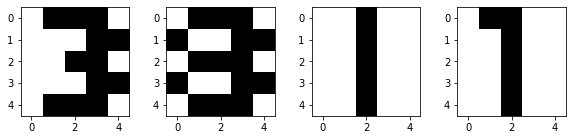

In [13]:
def plot_testset(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    data = np.array(data)
    for idx, row in enumerate(data):
        imarray = row.reshape((5, 5))
        plt.subplot(2, len(data), idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt


test_set = [[0,1,1,1,0,
             0,0,0,1,1,
             0,0,1,1,0,
             0,0,0,1,1,
             0,1,1,1,0],
            [0,1,1,1,0,
             1,0,0,1,1,
             0,1,1,1,0,
             1,0,0,1,1,
             0,1,1,1,0],
            [0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0],
            [0,1,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0]]
print(test_set)
plt.show(plot_testset(test_set))

In [14]:
for test_data in test_set:
    result = predict(test_data)
    result = np.array(result)
    print(np.argmax(result), np.array_str(result, precision=2, suppress_small=True))

3 [0.   0.01 0.   0.97 0.   0.   0.   0.01 0.   0.1 ]
9 [0.   0.   0.   0.   0.   0.58 0.   0.   0.96 1.  ]
1 [0.   0.96 0.03 0.02 0.   0.   0.   0.   0.   0.  ]
3 [0.   0.14 0.   0.84 0.   0.   0.   0.   0.   0.  ]


3 [0.   0.   0.   0.93 0.   0.   0.   0.01 0.   0.1 ]
9 [0.   0.   0.   0.   0.   0.54 0.   0.   0.91 1.  ]
1 [0.   0.96 0.03 0.02 0.   0.   0.   0.   0.   0.  ]
3 [0.   0.22 0.   0.73 0.   0.   0.   0.   0.   0.  ]

In [15]:
for test_data in inputs:
    result = predict(test_data)
    result = np.array(result)
    print(np.argmax(result), np.array_str(result, precision=2, suppress_small=True))

0 [0.96 0.   0.   0.   0.   0.   0.   0.02 0.03 0.  ]
1 [0.   0.96 0.03 0.02 0.   0.   0.   0.   0.   0.  ]
2 [0.   0.02 0.96 0.   0.   0.03 0.   0.   0.   0.  ]
3 [0.   0.03 0.   0.97 0.   0.   0.   0.02 0.   0.03]
4 [0.   0.02 0.01 0.   0.98 0.   0.   0.   0.   0.  ]
5 [0.   0.   0.02 0.   0.   0.96 0.01 0.   0.02 0.01]
6 [0.   0.   0.01 0.   0.01 0.01 0.99 0.   0.   0.  ]
7 [0.02 0.   0.   0.02 0.   0.   0.   0.97 0.   0.  ]
8 [0.04 0.   0.   0.   0.   0.02 0.   0.   0.96 0.03]
9 [0.   0.   0.   0.01 0.   0.02 0.   0.   0.03 0.95]


# Neural Networks Done Properly...

And we still have a bit to go from classifying digits with a Multi-layer Perceptron to a Convolutional Neural Network (CNN), which is the technique used e.g. in IBM's Watson app for visual recognition. 

A modern framework for implementing various types of neural networks is Google's **Tensorflow**.


```bash
conda install theano
conda install -c conda-forge tensorflow  
conda install -c conda-forge keras
```

You can get more information about it here:

  * https://www.youtube.com/watch?v=qyvlt7kiQoI
  * https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0
  * https://github.com/martin-gorner/tensorflow-mnist-tutorial/blob/master/mnist_1.0_softmax.py
  * https://en.wikipedia.org/wiki/MNIST_database




In [16]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [17]:
mnist = tf.keras.datasets.mnist #28x28 handwritten digits
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

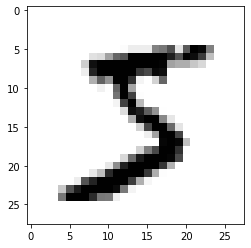

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

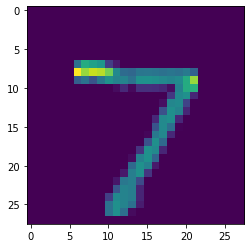

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
x_train = tf.keras.utils.normalize(x_train,axis=1) # normalize scales all values down to a number between 0 and 1
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_test[0])
plt.show()
print(x_test[0])

## Exercise with tensorflow and handwritten digits

Your task is to extend the above example to work with the 'classical' MNIST dataset, which contains many thousands of handwritten digits. 

First you should watch the video https://hooktube.com/watch?v=wQ8BIBpya2k, which gives an introduction to Google's Tensorflow - a Python framework helping to build neural networks- and you follow the tutorial on https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist.

You have to reproduce their solution and the results.

# Possible Projects:

  * Implementation of a Salient Region Detector: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.228.5552&rep=rep1&type=pdf
  * Audio Fingerprinting: http://willdrevo.com/fingerprinting-and-audio-recognition-with-python/
  * Survival on the Titanic: https://www.kaggle.com/c/titanic
  * Predict forest cover: https://www.kaggle.com/c/forest-cover-type-prediction
  * How to get free pizza: https://www.kaggle.com/c/random-acts-of-pizza